In [45]:
%load_ext autoreload 
%autoreload 2
import cv2
import json, os, cv2
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm
from tqdm import tqdm
import itertools 
from scipy.interpolate import interp1d
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import os, fnmatch
from scipy.spatial.distance import cdist
import matplotlib.gridspec as gridspec


import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')

from utils.base_functions import *
from src.utils.auxiliary import flatten_series
from src.utils.path import find
from src.base import BaseInput
from plots.plots import plot_oa

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#session = plot_oa('D:/obstacle_avoidance/metadata/oa_021523_LT.json')
#session.gather_session_df()
#session.process_df()
#
#df = session.df

session1 = plot_oa('D:/obstacle_avoidance/metadata/non_obstacle_041723_042123.json')
session1.gather_session_df()

df1 = session1.df

In [26]:
df = pd.read_hdf(r"D:\obstacle_avoidance\recordings\042023\G8CKLT\oa\testG8CKLT_042023_oa.h5")

In [5]:
def create_dict_from_dataframe(df, column_name):
    dictionary = {}
    for index, row in df.iterrows():
        dictionary[index] = row[column_name]
    return dictionary



In [6]:
nose_x =  create_dict_from_dataframe(df1,'ts_nose_x_cm')

In [33]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42],
           dtype='int64')

(array([14., 11.,  6.,  2.,  2.,  1.,  2.,  2.,  0.,  2.]),
 array([ 3.6       ,  8.01666667, 12.43333333, 16.85      , 21.26666667,
        25.68333333, 30.1       , 34.51666667, 38.93333333, 43.35      ,
        47.76666667]),
 <BarContainer object of 10 artists>)

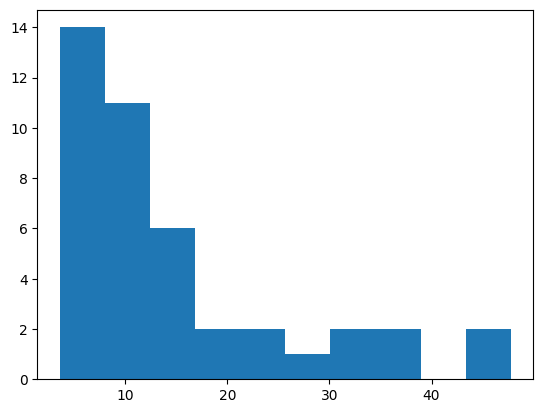

In [32]:
plt.hist(df['time'])

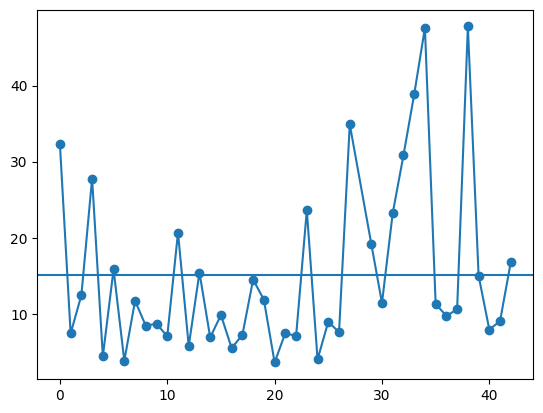

In [43]:
plt.plot(df.index,df['time'],'-o')
plt.axline((0,df['time'].mean()),slope=0)

In [53]:
right,left = df[df['odd']=='right'],df[df['odd']=='left']

In [55]:
right['nose_x_cm']

0     [48.50038320197105, 48.37061871154708, 48.1506...
1     [53.89772174577708, 53.88973244186561, 53.8559...
3     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
5     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
7     [53.96621877598111, 53.9618926477577, 53.95800...
9     [53.874513567970055, 53.82545024128417, 53.842...
11    [53.89717493091216, 53.9157424409717, 53.95075...
13    [53.91349711267677, 53.91046785510647, 53.9037...
15    [53.97356932270523, 53.99212231555597, 53.9785...
17    [53.93000801815584, nan, nan, nan, nan, 53.955...
19    [53.81036686133744, 53.78143890326187, 53.7587...
21    [53.988033301743016, 53.987704245010136, 53.96...
23    [53.90155912797078, 53.928111102872194, 53.944...
25    [53.93808442532013, 53.97910037925932, 53.9875...
27    [53.93686014071104, 53.9589069418138, 53.92946...
30    [53.85160541247829, 53.85423302727171, 53.8870...
32    [53.953090380153235, 53.975911432392174, 53.96...
34    [53.57107970863105, 53.69158221983845, 53.

In [56]:
df['ts_nose_x_cm'].to_numpy()

array([array([48.50038320197105, 48.37061871154708, 48.15067815910602, ...,
              53.90311730838234, 53.92776752893051, 53.874431303786835],
             dtype=object)                                                 ,
       array([49.983383828212425, 49.87995355455783, 49.76600314359037,
              49.664842393578695, 49.5173911037626, 49.44520186345291,
              49.397101511617656, 49.391004283920225, 49.38500867668442,
              49.446271297834755, 49.53359230878719, 49.64409246312904,
              49.67199453844917, 49.66170183740756, 49.622234385740725,
              49.65990170351594, 49.61703722498911, 49.64117450415956,
              49.67147191893225, 49.679228947502864, 49.67139449381863,
              49.70387916805103, 49.77721526785619, 49.85390000382533,
              49.895786990292734, 49.889181660287186, 49.99654125845791,
              50.02846943968618, 50.1101819689709, 50.09432917695759,
              50.06178643388997, 49.960920867123974, 49.8

In [60]:
plt.plot(right_nose_x[ind],right_nose_y[ind])

TypeError: 'method' object is not subscriptable

In [71]:
right_nose_y

<bound method IndexOpsMixin.to_numpy of 0     [12.194359823228567, 12.24809648138174, 12.307...
1     [20.44147363606998, 20.420375292609044, 20.353...
3     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
5     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
7     [20.63628248053756, 20.557359674877894, 20.553...
9     [20.563135104446847, 20.536979933252727, 20.50...
11    [20.57965084899551, 20.587020751998033, 20.539...
13    [20.350895931275986, 20.34552698355353, 20.350...
15    [20.496414012786435, 20.489707062319265, 20.47...
17    [20.518647118068838, nan, nan, nan, nan, 20.54...
19    [21.42902370166464, 21.44568703783614, 21.5443...
21    [20.5018168339961, 20.458836217798844, 20.4934...
23    [20.421033406074798, 20.393842673986036, 20.39...
25    [20.50328065255044, 20.484195362043575, 20.506...
27    [20.469223280697673, 20.480137802183027, 20.51...
30    [20.61970866715368, 20.583202726082742, 20.586...
32    [20.516638904184365, 20.507621297982656, 20.54...
34    [2

In [ ]:
'mean_arenaTL_y_cm',
'mean_arenaTR_y_cm',
'mean_arenaBR_y_cm',
'mean_arenaBL_y_cm',
'mean_arenaTL_y_cm'

In [86]:
arena_x = pd.unique(df[['mean_arenaTL_x_cm',
'mean_arenaTR_x_cm','mean_arenaBR_x_cm',
'mean_arenaBL_x_cm',
'mean_arenaTL_x_cm']].values.ravel('K'))

arena_y = pd.unique(df[['mean_arenaTL_y_cm',
'mean_arenaTR_y_cm','mean_arenaBR_y_cm',
'mean_arenaBL_y_cm',
'mean_arenaTL_y_cm']].values.ravel('K'))


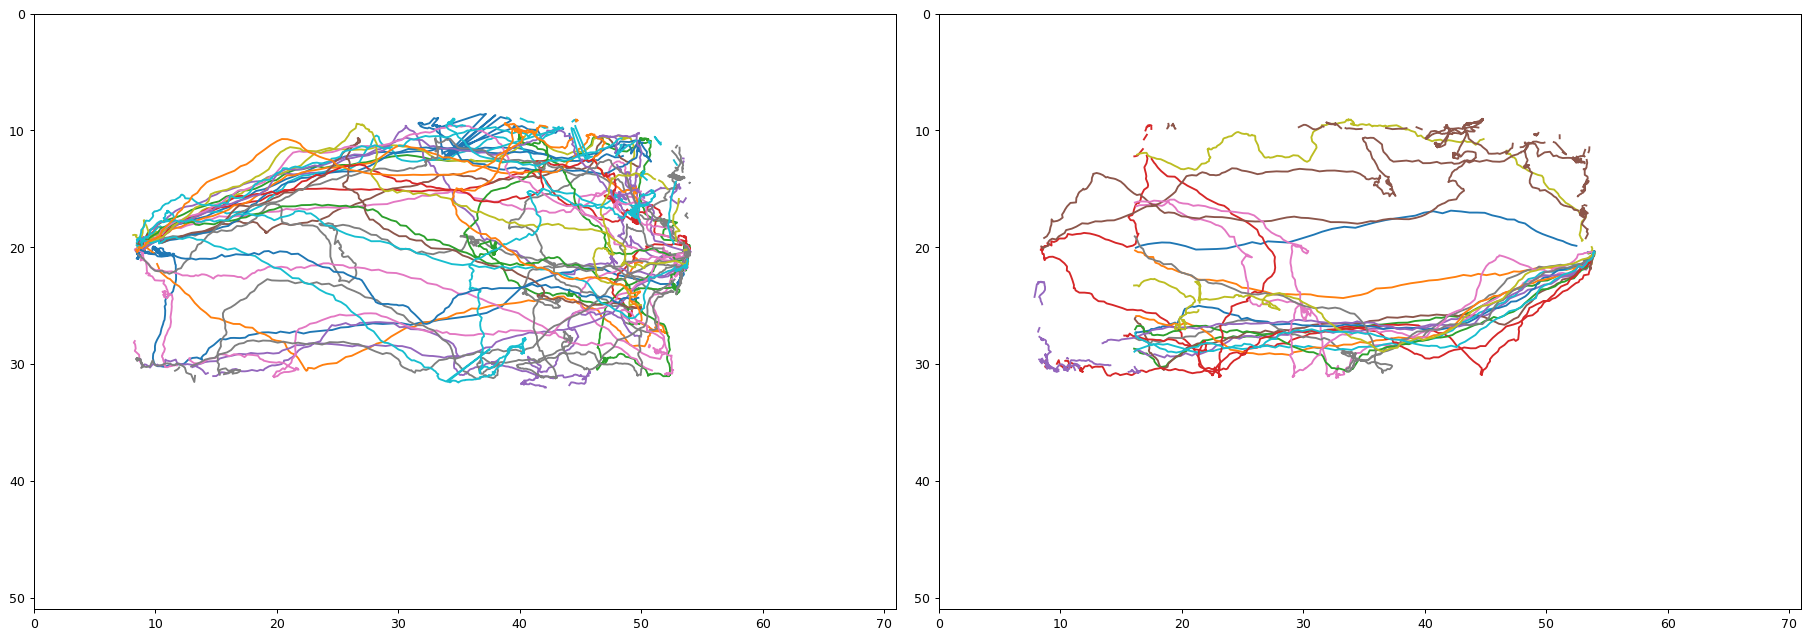

In [87]:
fig = plt.figure(constrained_layout=False, figsize=(20, 7),dpi=90)
spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec2[0,0])
ax2 = fig.add_subplot(spec2[0,1])
right,left = df[df['odd']=='right'],df[df['odd']=='left']
right_nose_x,right_nose_y=right['ts_nose_x_cm'].to_numpy(), right['ts_nose_y_cm'].to_numpy() 
left_nose_x,left_nose_y=left['ts_nose_x_cm'].to_numpy(), left['ts_nose_y_cm'].to_numpy() 

arena_x = pd.unique(df[['mean_arenaTL_x_cm',
'mean_arenaTR_x_cm','mean_arenaBR_x_cm',
'mean_arenaBL_x_cm',
'mean_arenaTL_x_cm']].values.ravel('K'))

arena_y = pd.unique(df[['mean_arenaTL_y_cm',
'mean_arenaTR_y_cm','mean_arenaBR_y_cm',
'mean_arenaBL_y_cm',
'mean_arenaTL_y_cm']].values.ravel('K'))

left_port =  pd.unique(df[['mean_leftportT_x_cm','mean_leftportT_y_cm']].values.ravel('K'))

right_port = pd.unique(df[['mean_rightportT_x_cm','mean_rightportT_y_cm']].values.ravel('K'))


for ind in range(len(right)):
    ax1.plot(right_nose_x[ind],right_nose_y[ind])
    ax1.set_ylim([51,0]); ax1.set_xlim([0, 71])

for ind in range(len(left)):
    ax2.plot(left_nose_x[ind],left_nose_y[ind])
    ax2.set_ylim([51,0]); ax2.set_xlim([0, 71])



In [26]:
df1.loc[['animal','date']]

KeyError: "None of [Index(['animal', 'date'], dtype='object')] are in the [index]"